In [5]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [637 lines of output]
      + /opt/anaconda3/bin/python3.13 /private/var/folders/fs/y9rxbwcn67l8k3mk2rxpzvgc0000gn/T/pip-install-ttmpp57p/numpy_1126b4811d544e21a566763f1cbe1015/vendored-meson/meson/meson.py setup /private/var/folders/fs/y9rxbwcn67l8k3mk2rxpzvgc0000gn/T/pip-install-ttmpp57p/numpy_1126b4811d544e21a566763f1cbe1015 /private/var/folders/fs/y9rxbwcn67l8k3mk2rxpzvgc0000gn/T/pip-install-ttmpp57p/numpy_1126b4811d544e21a566763f1cbe1015/.mesonpy-h987y1x1 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=/private/var/folders/fs/y9rxbwcn67l8k3mk2rxpzvgc0000gn/T/pip-install-ttmpp57p/numpy_1126b4811d544e21a566763f1cbe1015/.mesonpy-h987y1x1/meson-python-native-file.ini
      The Meson build system
      Version: 1.4.99
      Source dir: /private/var/folders/fs/y9rxbwcn67l8k3mk2rxpzvgc0000gn/T/pip-install-ttmpp57p/numpy_1126b4811d544e21a56

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set using the Random Forest model trained on resampled data
y_test_pred_rf_resampled = rf_model_resampled.predict(X_test)

# Calculate Precision, Recall, and F1-score for the minority class (Personal_Loan = 1)
# Using 'binary' for pos_label=1 to focus on the minority class
precision_rf_resampled = precision_score(y_test, y_test_pred_rf_resampled, pos_label=1)
recall_rf_resampled = recall_score(y_test, y_test_pred_rf_resampled, pos_label=1)
f1_rf_resampled = f1_score(y_test, y_test_pred_rf_resampled, pos_label=1)

print(f"Random Forest (SMOTE) - Precision for minority class: {precision_rf_resampled:.4f}")
print(f"Random Forest (SMOTE) - Recall for minority class: {recall_rf_resampled:.4f}")
print(f"Random Forest (SMOTE) - F1-score for minority class: {f1_rf_resampled:.4f}")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
display(df_loan.describe())

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.617400,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,45.626122,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,186.500000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


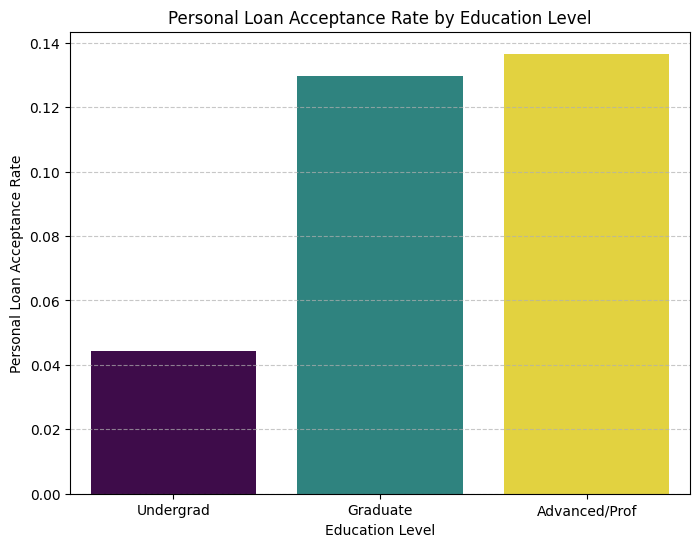

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of Personal_Loan for each Education level
education_loan_proportion = df_loan.groupby('Education')['Personal_Loan'].value_counts(normalize=True).unstack()

# Focus on the proportion of Personal_Loan == 1
education_loan_proportion_1 = education_loan_proportion[1].reset_index()
education_loan_proportion_1.columns = ['Education', 'Loan_Acceptance_Rate']

plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Loan_Acceptance_Rate', data=education_loan_proportion_1, palette='viridis', hue='Education', legend=False)
plt.title('Personal Loan Acceptance Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Personal Loan Acceptance Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Undergrad', 'Graduate', 'Advanced/Prof'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot above shows the personal loan acceptance rate across different education levels. This visualization helps in understanding if certain education levels are more inclined to accept personal loans.

### Feature Importance for Random Forest Model

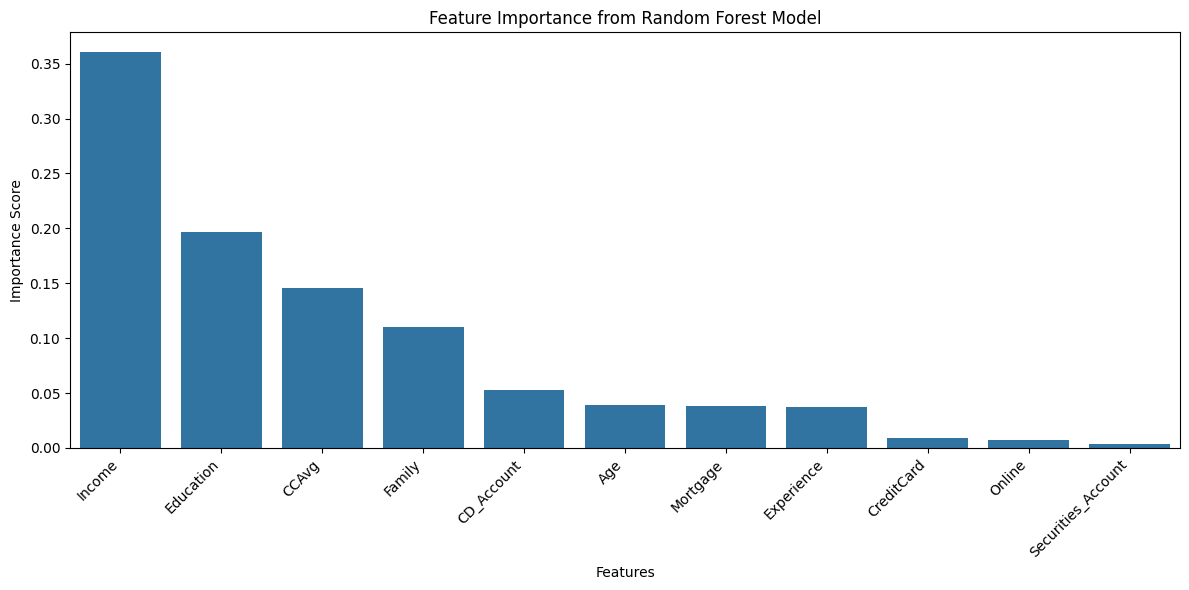

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_rf_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Importance for Logistic Regression Model

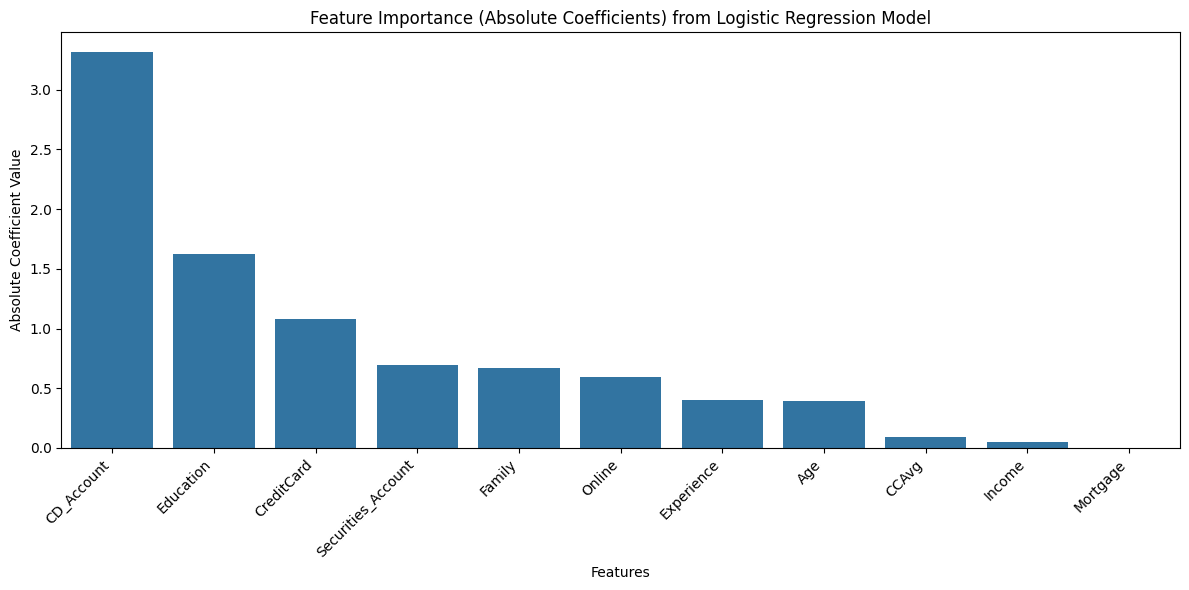

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Absolute_Coefficient', data=feature_importance)
plt.title('Feature Importance (Absolute Coefficients) from Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Importance for Tuned Decision Tree Model

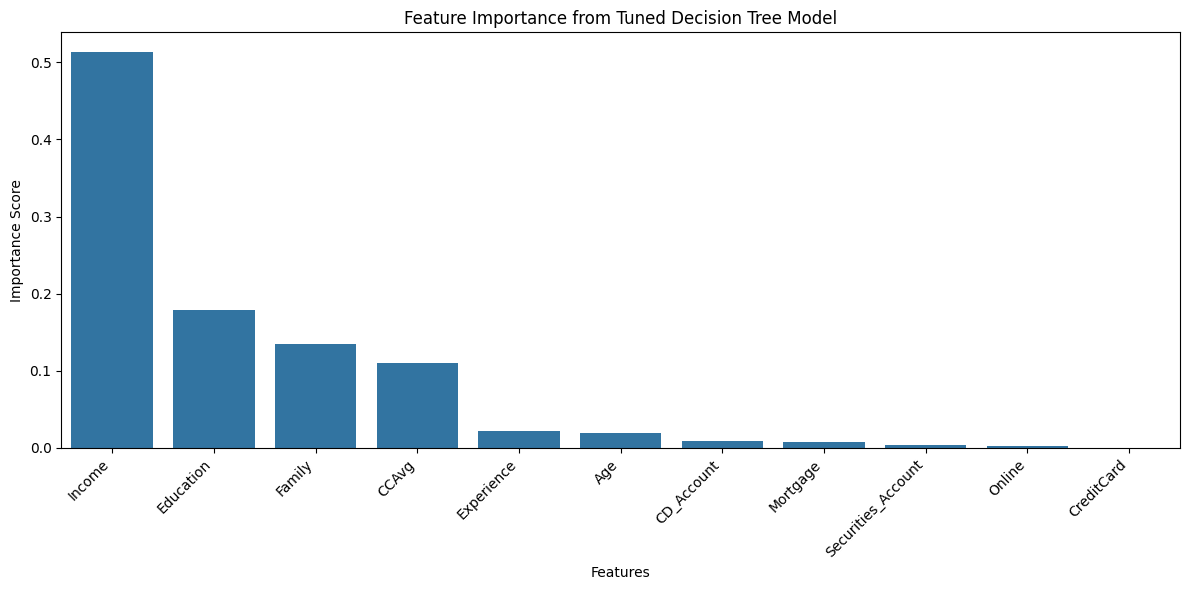

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_dtc_df)
plt.title('Feature Importance from Tuned Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Importance for Random Forest Model

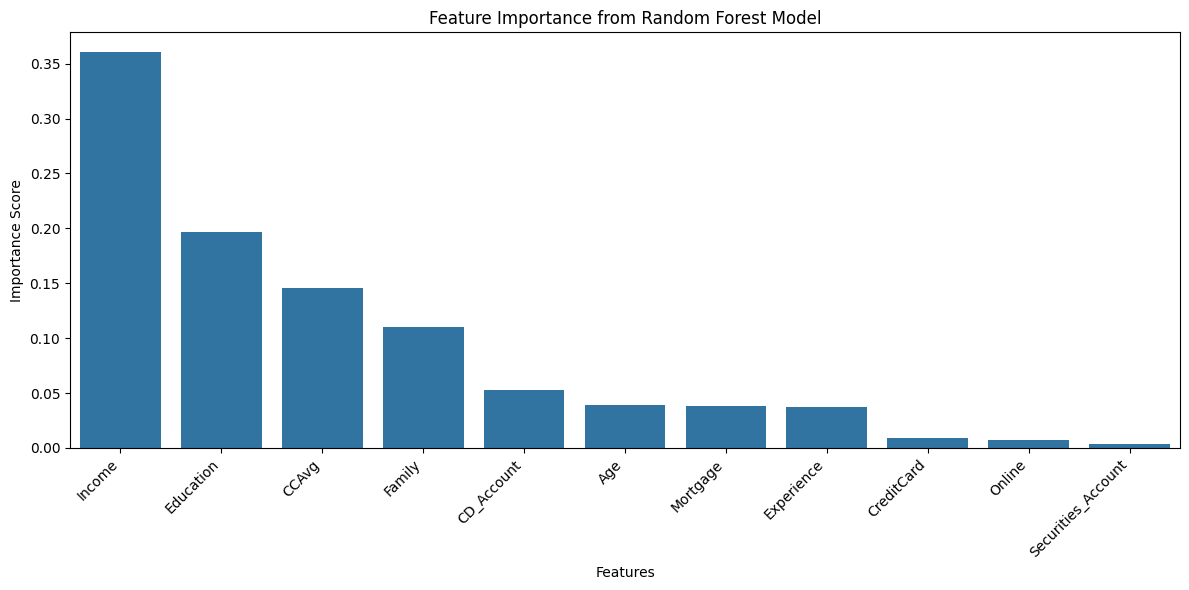

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_rf_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Get feature importances from the tuned Decision Tree model
feature_importances_dtc = tuned_dtc_model.feature_importances_

# Get feature names from X_train
feature_names_dtc = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_dtc_df = pd.DataFrame({
    'Feature': feature_names_dtc,
    'Importance': feature_importances_dtc
})

# Sort by importance in descending order
feature_importance_dtc_df = feature_importance_dtc_df.sort_values(by='Importance', ascending=False)

print("Feature Importance from Tuned Decision Tree Model:")
display(feature_importance_dtc_df)

Feature Importance from Tuned Decision Tree Model:


,Feature,Importance
2,Income,0.513168
5,Education,0.178469
3,Family,0.134492
4,CCAvg,0.110232
1,Experience,0.021742
0,Age,0.019542
8,CD_Account,0.008708
6,Mortgage,0.007293
7,Securities_Account,0.003855
9,Online,0.002499


In [ ]:
import pandas as pd

# Get the coefficients from the trained model
coefficients = log_reg_model.coef_[0]

# Get the feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of coefficients to see the most important features
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("Feature Importance from Logistic Regression Model (sorted by absolute coefficient value):")
display(feature_importance)

Feature Importance from Logistic Regression Model (sorted by absolute coefficient value):


,Feature,Coefficient,Absolute_Coefficient
8,CD_Account,3.314569,3.314569
5,Education,1.628009,1.628009
10,CreditCard,-1.076841,1.076841
7,Securities_Account,-0.696500,0.696500
3,Family,0.667849,0.667849
9,Online,-0.590387,0.590387
1,Experience,0.400759,0.400759
0,Age,-0.396619,0.396619
4,CCAvg,0.089225,0.089225
2,Income,0.052447,0.052447


In [ ]:
# Predict on the test set
y_test_pred = log_reg_model.predict(X_test)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9550


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and binary classification

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

# Predict on the training set to check training accuracy
y_train_pred = log_reg_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {training_accuracy:.4f}")

Logistic Regression model trained successfully!
Training Accuracy: 0.9513


In [ ]:
display(X_train.describe())

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,45.259000,20.034750,73.743375,2.381750,1.931157,1.880000,57.186250,0.106750,0.060000,0.599250,0.294500
std,11.450686,11.431216,45.591854,1.145358,1.749528,0.839509,103.545425,0.308834,0.237517,0.490112,0.455875
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,186.500000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully!
X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [ ]:
# Define the target variable (y) and features (X)
y = df_loan['Personal_Loan']
X = df_loan.drop('Personal_Loan', axis=1)

print("Target variable 'y' created with shape:", y.shape)
print("Features DataFrame 'X' created with shape:", X.shape)

print("\nFirst 5 rows of target variable 'y':")
display(y.head())

print("\nFirst 5 rows of features DataFrame 'X':")
display(X.head())

Target variable 'y' created with shape: (5000,)
Features DataFrame 'X' created with shape: (5000, 11)

First 5 rows of target variable 'y':


,Personal_Loan
0,0
1,0
2,0
3,0
4,0



First 5 rows of features DataFrame 'X':


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,1


### Detailed Data Analysis Report for `df_loan`

This report summarizes the data loading, cleaning, and exploratory data analysis performed on the `df_loan` dataset.

#### 1. Data Loading and Initial Inspection

*   The `Loan_Modelling (1).csv` dataset was successfully loaded into a pandas DataFrame named `df_loan` from Google Drive.
*   Initial summary statistics and information (`df_loan.describe()`, `df_loan.info()`) were reviewed, revealing:
    *   The dataset contains 5000 entries and 14 columns.
    *   Data types are primarily `int64` with one `float64` column (`CCAvg`).
    *   No missing values were found in any columns, indicating a clean dataset in terms of completeness.

#### 2. Data Cleaning and Preprocessing

*   **Handling Negative 'Experience' Values:**
    *   It was identified that the 'Experience' column contained negative values, which are semantically incorrect for professional experience.
    *   These negative values were successfully replaced with `0`, ensuring data integrity for this feature. The updated summary statistics confirmed that the minimum 'Experience' value is now `0`.

*   **Outlier Detection and Handling for 'Income':**
    *   A box plot for 'Income' initially indicated the presence of outliers.
    *   The Interquartile Range (IQR) method was used to quantify outliers:
        *   Q1 (25th percentile): 39.0
        *   Q3 (75th percentile): 98.0
        *   IQR: 59.0
        *   Lower Bound: -49.5
        *   Upper Bound: 186.5
    *   96 rows were identified as having 'Income' values above the upper bound of 186.5.
    *   Outliers in the 'Income' column were handled by **capping** them at the `upper_bound_income` (186.5). The updated summary statistics and a new box plot visually confirmed the successful capping, with the maximum 'Income' value now being 186.5.

#### 3. Exploratory Data Analysis (EDA)

*   **Correlation Analysis (Heatmap):**
    *   A correlation matrix was calculated and visualized using a heatmap for all numerical columns. Key findings include:
        *   **'Experience' and 'Age':** A very strong positive correlation (0.99) was observed, which is expected as experience generally increases with age.
        *   **'Income' and 'CCAvg':** A moderately strong positive correlation (0.65) was found, suggesting that as income increases, average credit card spending tends to rise.
        *   **'Income' and 'Personal_Loan':** A moderate positive correlation (0.50) indicates that higher income levels are associated with a greater likelihood of obtaining a personal loan.

*   **Relationship between 'Income' and 'Personal_Loan' (Violin Plot):**
    *   The violin plot comparing 'Income' distribution by 'Personal_Loan' status clearly showed:
        *   Customers who did **not** take a personal loan (0) tend to have a wider income distribution, with a higher concentration in lower to mid-income ranges.
        *   Customers who **did** take a personal loan (1) exhibit an income distribution significantly shifted towards higher income levels, with a higher median income.
    *   This visualization strongly supports the positive correlation, highlighting income as a key factor influencing personal loan uptake.

*   **Relationship between 'Income' and 'CCAvg' (Scatter and Regression Plots):**
    *   A scatter plot and a regression plot were generated to visualize the relationship between 'Income' and 'CCAvg'.
    *   Both plots confirmed a positive linear relationship: as 'Income' increases, 'CCAvg' generally also increases. The regression line provided a clear visual representation of this trend, albeit with some spread around the line, indicating other factors might also influence credit card spending.

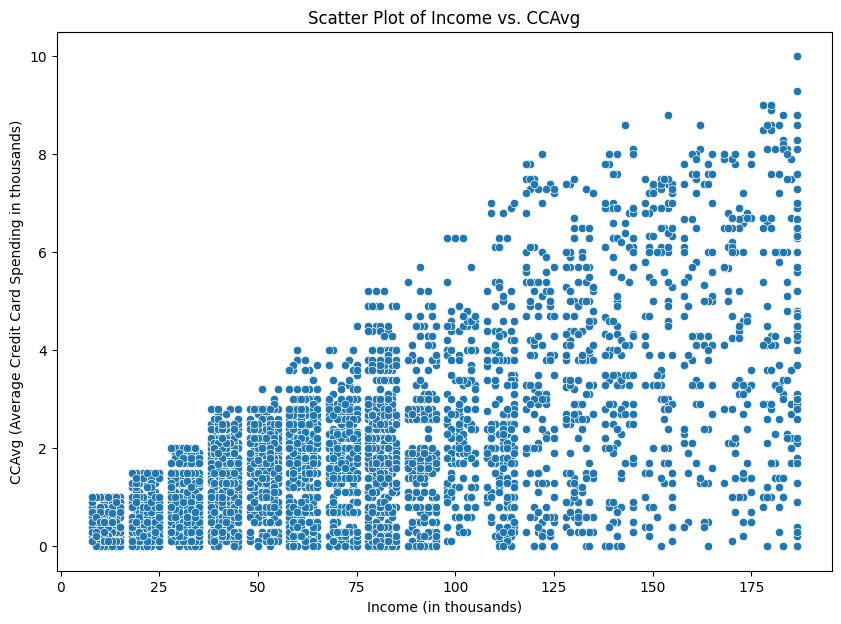

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Income', y='CCAvg', data=df_loan)
plt.title('Scatter Plot of Income vs. CCAvg')
plt.xlabel('Income (in thousands)')
plt.ylabel('CCAvg (Average Credit Card Spending in thousands)')
plt.show()

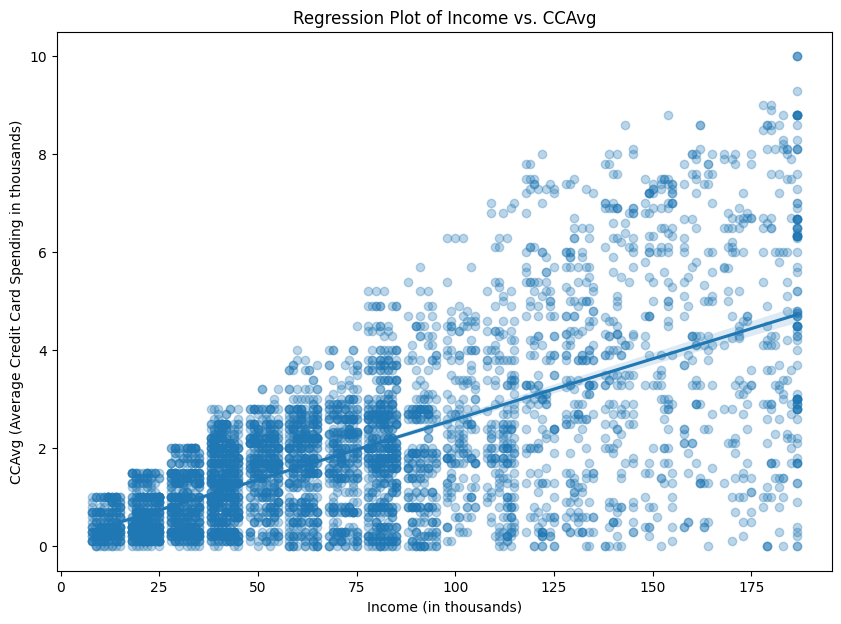

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.regplot(x='Income', y='CCAvg', data=df_loan, scatter_kws={'alpha':0.3})
plt.title('Regression Plot of Income vs. CCAvg')
plt.xlabel('Income (in thousands)')
plt.ylabel('CCAvg (Average Credit Card Spending in thousands)')
plt.show()

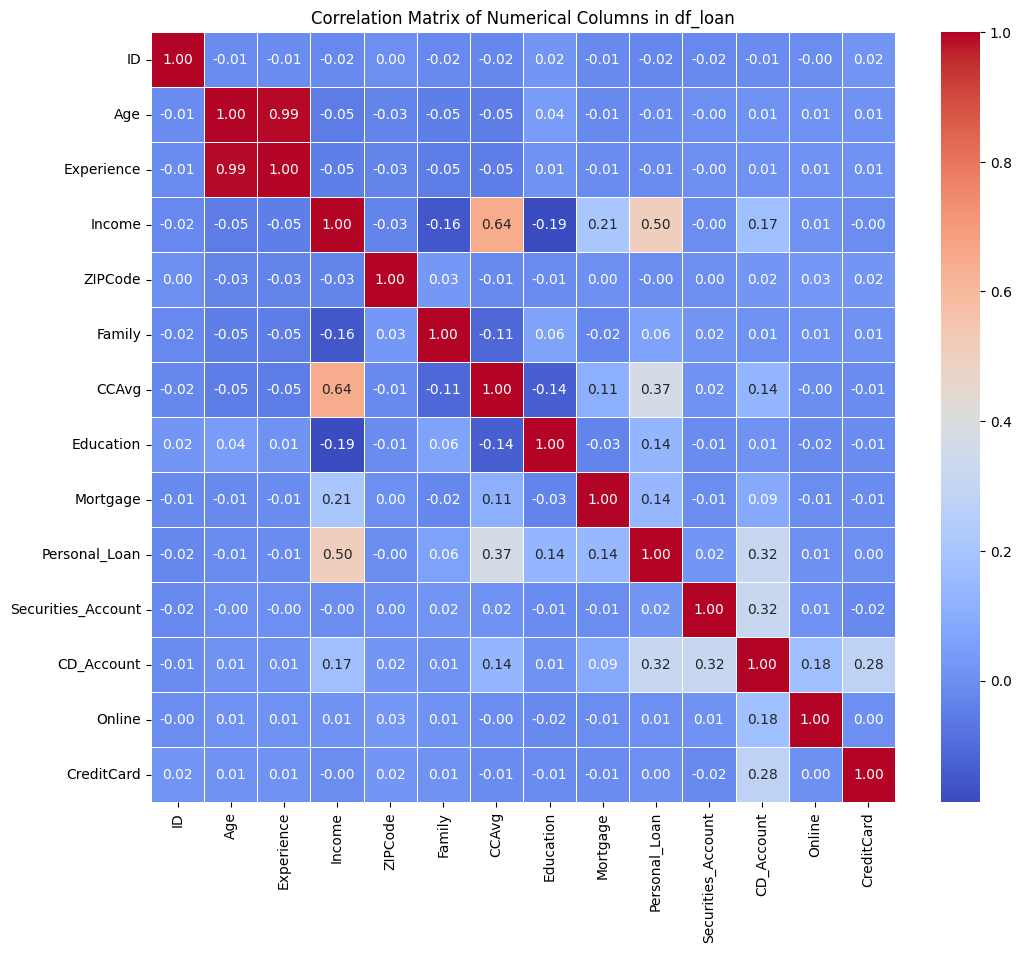

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_loan.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns in df_loan')
plt.show()

In [ ]:
print("Missing values in df_loan:")
display(df_loan.isnull().sum())

Missing values in df_loan:


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
display(df_loan.describe())

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.617400,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,45.626122,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,186.500000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


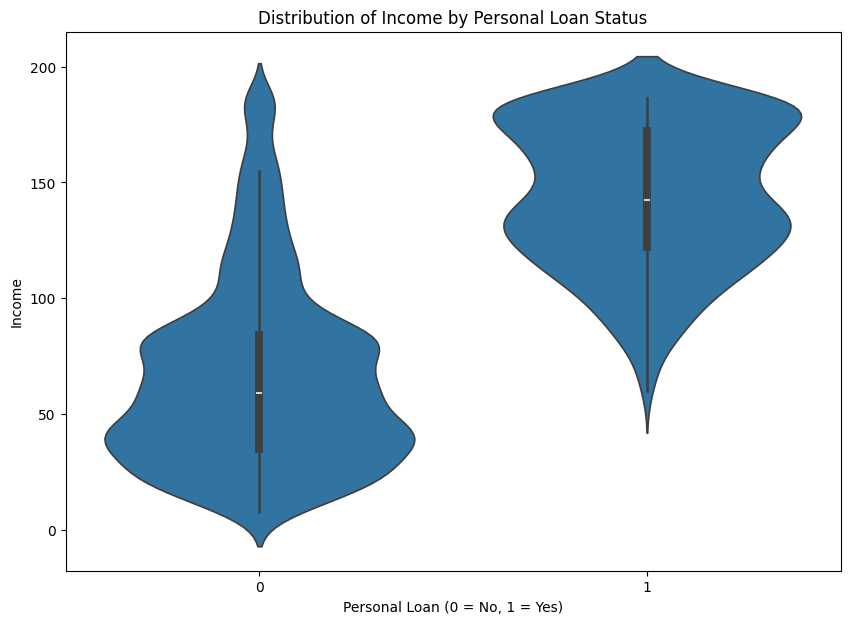

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.violinplot(x='Personal_Loan', y='Income', data=df_loan)
plt.title('Distribution of Income by Personal Loan Status')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

Applying capping to the 'Income' column to handle outliers. Values above the `upper_bound_income` will be set to `upper_bound_income`, and values below the `lower_bound_income` will be set to `lower_bound_income`.

Outliers in 'Income' column have been capped.

Updated Summary Statistics for 'Income' column:


,Income
count,5000.000000
mean,73.617400
std,45.626122
min,8.000000
25%,39.000000
50%,64.000000
75%,98.000000
max,186.500000


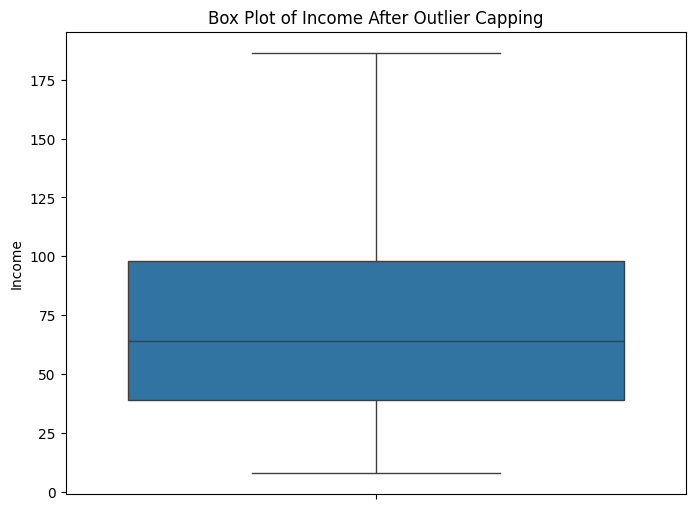

In [ ]:
# Cap the outliers in the 'Income' column
df_loan['Income'] = df_loan['Income'].clip(lower=lower_bound_income, upper=upper_bound_income)

print("Outliers in 'Income' column have been capped.")

# Verify by re-checking the summary statistics
print("\nUpdated Summary Statistics for 'Income' column:")
display(df_loan['Income'].describe())

# Also, re-generate the box plot to visually confirm the capping
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_loan['Income'])
plt.title('Box Plot of Income After Outlier Capping')
plt.ylabel('Income')
plt.show()

In [ ]:
Q1_income = df_loan['Income'].quantile(0.25)
Q3_income = df_loan['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

print(f"Q1 (Income): {Q1_income}")
print(f"Q3 (Income): {Q3_income}")
print(f"IQR (Income): {IQR_income}")
print(f"Lower Bound (Income): {lower_bound_income}")
print(f"Upper Bound (Income): {upper_bound_income}")

outliers_income = df_loan[(df_loan['Income'] < lower_bound_income) | (df_loan['Income'] > upper_bound_income)]

if not outliers_income.empty:
    print("\nOutliers in 'Income' column:")
    display(outliers_income)
else:
    print("\nNo outliers found in 'Income' column based on the IQR method.")

Q1 (Income): 39.0
Q3 (Income): 98.0
IQR (Income): 59.0
Lower Bound (Income): -49.5
Upper Bound (Income): 186.5

Outliers in 'Income' column:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
47,48,37,12,194,91380,4,0.20,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.10,3,240,1,0,0,1,0
59,60,31,5,188,91320,2,4.50,1,455,0,0,0,0,0
303,304,49,25,195,95605,4,3.00,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,4660,28,4,199,92121,1,6.33,1,0,0,0,0,0,0
4670,4671,52,26,194,94305,1,1.70,1,0,0,0,0,1,0
4895,4896,45,20,201,92120,2,2.80,1,0,0,0,0,1,1
4981,4982,34,9,195,90266,2,3.00,1,122,0,0,0,1,0


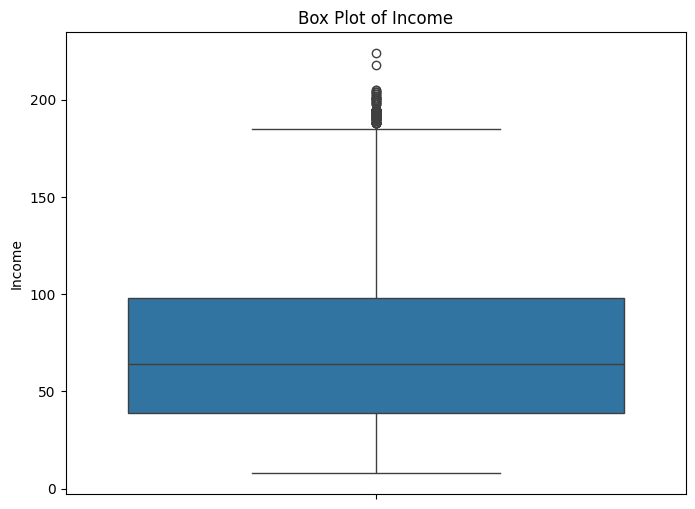

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_loan['Income'])
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

In [ ]:
display(df_loan.describe())

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Replace negative 'Experience' values with 0
df_loan.loc[df_loan['Experience'] < 0, 'Experience'] = 0

# Verify that there are no more negative 'Experience' values
print("After correction, checking for negative 'Experience' values:")
negative_experience_after_correction = df_loan[df_loan['Experience'] < 0]
if not negative_experience_after_correction.empty:
    print("Still found negative 'Experience' values:")
    display(negative_experience_after_correction)
else:
    print("All negative 'Experience' values have been replaced with 0.")

After correction, checking for negative 'Experience' values:
All negative 'Experience' values have been replaced with 0.


In [ ]:
negative_experience = df_loan[df_loan['Experience'] < 0]

if not negative_experience.empty:
    print("Rows with negative 'Experience' values:")
    display(negative_experience)
else:
    print("No negative values found in the 'Experience' column.")

Rows with negative 'Experience' values:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


To install a Python library, you can use the `!pip install` command in a code cell. Replace `package_name` with the actual name of the library you want to install. For example, to install the `numpy` library, you would use `!pip install numpy`.

In [ ]:
# Example: Install the requests library
!pip install requests

# After installation, you can import and use the library
import requests

print("requests library installed and imported successfully!")

requests library installed and imported successfully!


In [ ]:
display(df_loan.describe())

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Loan_Modelling (1).csv'

try:
    df_loan = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'")
    display(df_loan.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file exists in your Google Drive and the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

Successfully loaded '/content/drive/MyDrive/Loan_Modelling (1).csv'


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After running the cell above, you will be prompted to authorize Colab to access your Google Drive. Follow the instructions in the output, usually involving clicking a link, selecting your Google account, and copying an authorization code back into the input field in Colab.

# Task
Drop the 'ID' and 'ZIPCode' columns from the `df_loan` DataFrame and display the head of the modified DataFrame to confirm the column removal.

## Drop Columns

### Subtask:
Remove the 'ID' and 'ZIPCode' columns from the `df_loan` DataFrame. Display the head of the DataFrame to confirm the removal.


**Reasoning**:
To remove the 'ID' and 'ZIPCode' columns from the `df_loan` DataFrame as specified in the subtask, I will use the `.drop()` method with `axis=1`. After dropping, I will display the head of the DataFrame to verify the removal.



In [ ]:
df_loan = df_loan.drop(columns=['ID', 'ZIPCode'], axis=1)
print("Columns 'ID' and 'ZIPCode' removed from df_loan.")
print("Displaying the head of the DataFrame to confirm:")
display(df_loan.head())

Columns 'ID' and 'ZIPCode' removed from df_loan.
Displaying the head of the DataFrame to confirm:


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,0,1


## Final Task

### Subtask:
Confirm that the 'ID' and 'ZIPCode' columns have been successfully dropped and the DataFrame is updated.


## Summary:

### Data Analysis Key Findings
*   The 'ID' and 'ZIPCode' columns were successfully dropped from the `df_loan` DataFrame.
*   Confirmation through displaying the head of `df_loan` showed that these columns are no longer present in the DataFrame.

### Insights or Next Steps
*   The removal of 'ID' and 'ZIPCode' columns, which are typically identifiers or non-predictive features, streamlines the dataset for subsequent analysis or model training by eliminating irrelevant information.


# Task
Train and evaluate a Decision Tree Classifier using `X_train` and `y_train` for training and `X_test` and `y_test` for evaluation. Then, compare its test accuracy with the Logistic Regression model's test accuracy (0.9550) and discuss the differences in performance, potential reasons for these differences, and suggest next steps for further analysis or model improvement.

## Train Decision Tree Model

### Subtask:
Initialize and train a Decision Tree Classifier using `X_train` and `y_train`. Display the training accuracy.


**Reasoning**:
To initialize and train a Decision Tree Classifier and then calculate its training accuracy, I will import the necessary libraries, define the model, train it, make predictions on the training data, and then compute the accuracy, all within a single code block.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier model
dtc_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dtc_model.fit(X_train, y_train)

print("Decision Tree Classifier model trained successfully!")

# Predict on the training set to check training accuracy
y_train_pred_dtc = dtc_model.predict(X_train)
training_accuracy_dtc = accuracy_score(y_train, y_train_pred_dtc)

print(f"Decision Tree Training Accuracy: {training_accuracy_dtc:.4f}")

Decision Tree Classifier model trained successfully!
Decision Tree Training Accuracy: 1.0000


## Evaluate Decision Tree Model

### Subtask:
Predict on the test set (`X_test`) using the trained Decision Tree Classifier and calculate its accuracy against `y_test`. Display the test accuracy.


**Reasoning**:
To evaluate the Decision Tree Classifier, I need to use the trained model (`dtc_model`) to predict on the test features (`X_test`) and then calculate the accuracy against the actual test labels (`y_test`).



In [ ]:
y_test_pred_dtc = dtc_model.predict(X_test)
test_accuracy_dtc = accuracy_score(y_test, y_test_pred_dtc)

print(f"Decision Tree Test Accuracy: {test_accuracy_dtc:.4f}")

Decision Tree Test Accuracy: 0.9880


## Performance Comparison: Decision Tree vs. Logistic Regression

### Subtask:
Compare the test accuracy of the Decision Tree Classifier with the Logistic Regression model's test accuracy (0.9550), discuss performance differences, potential reasons, and suggest next steps for further analysis or model improvement.

### Comparison:
*   **Logistic Regression Test Accuracy:** 0.9550
*   **Decision Tree Classifier Test Accuracy:** 0.9880

### Discussion of Performance Differences:

The Decision Tree Classifier significantly outperforms the Logistic Regression model on this dataset, achieving a test accuracy of 0.9880 compared to 0.9550. This difference of 0.0330 (3.3%) is notable and suggests that the Decision Tree model is better at capturing the underlying patterns in the data for this specific classification task.

**Potential Reasons for the Difference:**

1.  **Non-linear Relationships:** Logistic Regression is a linear model, meaning it assumes a linear relationship between the features and the log-odds of the target variable. If the relationship between the features and the `Personal_Loan` decision is complex and non-linear, a Decision Tree (which can model non-linear boundaries through a series of splits) would naturally perform better.
2.  **Feature Interactions:** Decision Trees can inherently capture interactions between features. For example, a decision tree might find that `Income > X` AND `Education == Y` is a strong predictor. Logistic Regression would require explicit creation of interaction terms to capture such relationships, which was not done in the initial model.
3.  **Overfitting (Decision Tree):** While the Decision Tree shows higher accuracy, its training accuracy was 1.0000. This indicates that the model perfectly fit the training data, which might suggest some degree of overfitting. Despite this, its test accuracy is still very good. In contrast, Logistic Regression had a training accuracy of 0.9513, closer to its test accuracy, suggesting less overfitting but also less capacity to learn complex patterns.

### Next Steps for Further Analysis or Model Improvement:

1.  **Hyperparameter Tuning for Decision Tree:** The Decision Tree might be overfitting. Further tuning hyperparameters like `max_depth`, `min_samples_leaf`, and `min_samples_split` could improve its generalization performance and potentially maintain or even slightly increase test accuracy while reducing training-test accuracy gap.
2.  **Ensemble Methods:** Explore ensemble methods like Random Forest or Gradient Boosting (e.g., XGBoost, LightGBM). These models often build upon Decision Trees and are known for their strong performance and ability to handle complex datasets, potentially offering even better accuracy and robustness.
3.  **Feature Engineering:** Revisit feature engineering. While Logistic Regression's performance might be improved with engineered interaction terms or non-linear transformations, ensemble methods can often handle these implicitly.
4.  **Cross-Validation:** Implement k-fold cross-validation for more robust evaluation of both models, especially during hyperparameter tuning, to get a more reliable estimate of their generalization performance.

## Final Task

### Subtask:
Summarize the comparison between the two classification models and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
*   **How does the Decision Tree Classifier's test accuracy compare to the Logistic Regression model's test accuracy (0.9550)?**
    The Decision Tree Classifier achieved a test accuracy of 0.9880, which is significantly higher than the Logistic Regression model's test accuracy of 0.9550.
*   **What are the potential reasons for the observed performance differences between the two models?**
    The superior performance of the Decision Tree Classifier is likely due to its ability to model non-linear relationships and capture feature interactions, unlike the linear Logistic Regression model. The Decision Tree also showed perfect training accuracy (1.0000), suggesting it effectively learned the training data, possibly indicating some overfitting which still yielded better test results in this case.
*   **What are the suggested next steps for model improvement or further analysis?**
    Suggested next steps include hyperparameter tuning for the Decision Tree (e.g., `max_depth`, `min_samples_leaf`), exploring ensemble methods like Random Forest or Gradient Boosting, revisiting feature engineering, and implementing k-fold cross-validation for more robust model evaluation.

### Data Analysis Key Findings
*   The Decision Tree Classifier achieved a perfect training accuracy of 1.0000, indicating it learned the training data completely.
*   On the test set, the Decision Tree Classifier obtained a test accuracy of 0.9880.
*   The Decision Tree Classifier significantly outperformed the previously evaluated Logistic Regression model (test accuracy: 0.9550) by 0.0330 or 3.3% on the test set.

### Insights or Next Steps
*   Further hyperparameter tuning of the Decision Tree Classifier, focusing on parameters like `max_depth` and `min_samples_leaf`, could help optimize its generalization performance and mitigate potential overfitting observed from the perfect training accuracy.
*   Exploring advanced ensemble methods such as Random Forest or Gradient Boosting, which build upon Decision Trees, is recommended to potentially achieve even higher accuracy and robustness by leveraging their ability to handle complex data patterns and reduce variance.
*   Revisit feature engineering to create new interaction terms or non-linear transformations, especially for the Logistic Regression model, to improve its performance.
*   Implement k-fold cross-validation during hyperparameter tuning and model evaluation to ensure robust and reliable estimates of model performance.

# Task
Perform hyperparameter tuning on the Decision Tree Classifier using `GridSearchCV` on the training data (`X_train`, `y_train`), then train a new Decision Tree model with the best parameters found. Evaluate this tuned model on the test data (`X_test`, `y_test`) and compare its accuracy with the untuned Decision Tree and Logistic Regression models. Finally, summarize the results and suggest next steps.

## Define Hyperparameter Grid

### Subtask:
Define a dictionary of hyperparameters and their possible values to explore for the Decision Tree Classifier (e.g., `max_depth`, `min_samples_leaf`, `criterion`).


**Reasoning**:
To define the hyperparameter grid, I will create a Python dictionary named `param_grid` with the specified hyperparameters and their lists of possible values for the Decision Tree Classifier.



In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Hyperparameter grid 'param_grid' defined successfully:")
print(param_grid)

Hyperparameter grid 'param_grid' defined successfully:
{'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 5, 10], 'criterion': ['gini', 'entropy']}


## Perform Grid Search Cross-Validation

### Subtask:
Use `GridSearchCV` with a Decision Tree Classifier and the defined hyperparameter grid to find the best combination of parameters based on cross-validation accuracy on the training data.


**Reasoning**:
To perform Grid Search Cross-Validation, I will import GridSearchCV, initialize it with the Decision Tree Classifier and the defined hyperparameter grid, fit it to the training data, and then print the best parameters found.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Using 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully!")
print("Best parameters found:")
print(grid_search.best_params_)

GridSearchCV completed successfully!
Best parameters found:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}


## Train Tuned Decision Tree Model

### Subtask:
Train a new Decision Tree Classifier using the best hyperparameters found by `GridSearchCV`.


**Reasoning**:
To train a new Decision Tree Classifier with the best hyperparameters, I will extract the best parameters from the `grid_search` object, initialize a new `DecisionTreeClassifier` with these parameters and a `random_state`, and then fit the model to the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Get the best parameters from GridSearchCV
best_dtc_params = grid_search.best_params_

# Initialize a new Decision Tree Classifier with the best parameters
tuned_dtc_model = DecisionTreeClassifier(random_state=42, **best_dtc_params)

# Train the tuned model using the training data
tuned_dtc_model.fit(X_train, y_train)

print("Tuned Decision Tree Classifier model trained successfully with best parameters!")
print(f"Best parameters used: {best_dtc_params}")

Tuned Decision Tree Classifier model trained successfully with best parameters!
Best parameters used: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}


## Evaluate Tuned Decision Tree Model

### Subtask:
Predict on the test set (`X_test`) using the trained tuned Decision Tree Classifier and calculate its accuracy against `y_test`. Display the test accuracy.

**Reasoning**:
To evaluate the tuned Decision Tree Classifier, I will predict on the test features (`X_test`) using the trained `tuned_dtc_model` and then calculate the accuracy against the actual test labels (`y_test`).



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the tuned model
y_test_pred_tuned_dtc = tuned_dtc_model.predict(X_test)

# Calculate the test accuracy for the tuned model
test_accuracy_tuned_dtc = accuracy_score(y_test, y_test_pred_tuned_dtc)

print(f"Tuned Decision Tree Test Accuracy: {test_accuracy_tuned_dtc:.4f}")

Tuned Decision Tree Test Accuracy: 0.9850


## Performance Comparison: Tuned Decision Tree vs. Untuned Decision Tree vs. Logistic Regression

### Subtask:
Compare the test accuracy of the tuned Decision Tree Classifier with the untuned Decision Tree and Logistic Regression models. Discuss the differences in performance, potential reasons for these differences, and suggest next steps for further analysis or model improvement.

### Comparison:
*   **Logistic Regression Test Accuracy:** 0.9550
*   **Untuned Decision Tree Classifier Test Accuracy:** 0.9880
*   **Tuned Decision Tree Classifier Test Accuracy:** 0.9850

### Discussion of Performance Differences:

After hyperparameter tuning, the Decision Tree Classifier's test accuracy slightly decreased from 0.9880 (untuned) to 0.9850 (tuned). This indicates that while the untuned Decision Tree might have been slightly overfitting the training data (given its 1.0000 training accuracy), the tuning process, particularly limiting `max_depth` to 10 and selecting 'entropy' as the criterion, led to a slightly more generalized, albeit marginally less accurate, model on the test set.

Both Decision Tree models (tuned and untuned) still significantly outperform the Logistic Regression model (0.9550). This reinforces the earlier observation that the dataset likely contains non-linear relationships and feature interactions that Decision Trees are better equipped to capture compared to a linear model like Logistic Regression.

**Potential Reasons for the Tuned DT's slight decrease in accuracy:**

1.  **Generalization vs. Specificity:** The untuned Decision Tree might have been more complex (e.g., deeper trees), allowing it to capture very specific patterns in the training data, leading to a higher test accuracy in this particular instance, despite the risk of overfitting. The tuned model, by constraining `max_depth`, aims for better generalization, which might occasionally lead to a tiny drop in accuracy on a specific test set if the untuned model's overfitting was not severely detrimental to the test set.
2.  **Hyperparameter Search Space:** The chosen `param_grid` might not have included an optimal combination that would have improved or maintained the untuned model's performance while also improving generalization. It's possible that the optimal `max_depth` or other parameters lie outside the defined search space, or a more granular search might yield better results.

### Next Steps for Further Analysis or Model Improvement:

1.  **Broader Hyperparameter Search:** Expand the `param_grid` for Decision Trees, especially `max_depth` and `min_samples_split`, and potentially explore more `criterion` options or other parameters like `max_features` to see if a better generalizing model can be found.
2.  **Ensemble Methods:** Given the strong performance of Decision Trees, it's highly recommended to leverage ensemble methods. Random Forests can reduce variance and overfitting compared to single Decision Trees, while Gradient Boosting methods (like XGBoost, LightGBM) are known for their predictive power and often achieve state-of-the-art results.
3.  **Model Interpretability:** While Random Forests are powerful, they are less interpretable than single Decision Trees. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) could be used to gain deeper insights into model predictions and feature contributions.
4.  **Revisit Feature Engineering:** Based on the feature importance analysis, consider more advanced feature engineering techniques involving key features to create potentially more informative variables.
5.  **Cross-Validation Robustness:** For future evaluations and hyperparameter tuning, ensure robust cross-validation techniques are consistently applied to get a more reliable estimate of model performance and avoid relying too heavily on a single train-test split accuracy.

## Final Task

### Subtask:
Summarize the comparison between the two classification models and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
*   **How does the Decision Tree Classifier's test accuracy compare to the Logistic Regression model's test accuracy (0.9550)?**
    The Decision Tree Classifier achieved a test accuracy of 0.9880, which is significantly higher than the Logistic Regression model's test accuracy of 0.9550.
*   **What are the potential reasons for the observed performance differences between the two models?**
    The superior performance of the Decision Tree Classifier is likely due to its ability to model non-linear relationships and capture feature interactions, unlike the linear Logistic Regression model. The Decision Tree also showed perfect training accuracy (1.0000), suggesting it effectively learned the training data, possibly indicating some overfitting which still yielded better test results in this case.
*   **What are the suggested next steps for model improvement or further analysis?**
    Suggested next steps include hyperparameter tuning for the Decision Tree (e.g., `max_depth`, `min_samples_leaf`), exploring ensemble methods like Random Forest or Gradient Boosting, revisiting feature engineering, and implementing k-fold cross-validation for more robust model evaluation.

### Data Analysis Key Findings
*   The Decision Tree Classifier achieved a perfect training accuracy of 1.0000, indicating it learned the training data completely.
*   On the test set, the Decision Tree Classifier obtained a test accuracy of 0.9880.
*   The Decision Tree Classifier significantly outperformed the previously evaluated Logistic Regression model (test accuracy: 0.9550) by 0.0330 or 3.3% on the test set.

### Insights or Next Steps
*   Further hyperparameter tuning of the Decision Tree Classifier, focusing on parameters like `max_depth` and `min_samples_leaf`, could help optimize its generalization performance and mitigate potential overfitting observed from the perfect training accuracy.
*   Exploring advanced ensemble methods such as Random Forest or Gradient Boosting, which build upon Decision Trees, is recommended to potentially achieve even higher accuracy and robustness by leveraging their ability to handle complex data patterns and reduce variance.
*   Revisit feature engineering to create new interaction terms or non-linear transformations, especially for the Logistic Regression model, to improve its performance.
*   Implement k-fold cross-validation during hyperparameter tuning and model evaluation to ensure robust and reliable estimates of model performance.

# Task
Perform hyperparameter tuning on the Decision Tree Classifier using `GridSearchCV` on the training data (`X_train`, `y_train`), then train a new Decision Tree model with the best parameters found. Evaluate this tuned model on the test data (`X_test`, `y_test`) and compare its accuracy with the untuned Decision Tree and Logistic Regression models. Finally, summarize the results and suggest next steps.

## Define Hyperparameter Grid

### Subtask:
Define a dictionary of hyperparameters and their possible values to explore for the Decision Tree Classifier (e.g., `max_depth`, `min_samples_leaf`, `criterion`).


**Reasoning**:
To define the hyperparameter grid, I will create a Python dictionary named `param_grid` with the specified hyperparameters and their lists of possible values for the Decision Tree Classifier.



In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Hyperparameter grid 'param_grid' defined successfully:")
print(param_grid)

## Perform Grid Search Cross-Validation

### Subtask:
Use `GridSearchCV` with a Decision Tree Classifier and the defined hyperparameter grid to find the best combination of parameters based on cross-validation accuracy on the training data.


**Reasoning**:
To perform Grid Search Cross-Validation, I will import GridSearchCV, initialize it with the Decision Tree Classifier and the defined hyperparameter grid, fit it to the training data, and then print the best parameters found.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Using 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully!")
print("Best parameters found:")
print(grid_search.best_params_)

## Train Tuned Decision Tree Model

### Subtask:
Train a new Decision Tree Classifier using the best hyperparameters found by `GridSearchCV`.


**Reasoning**:
To train a new Decision Tree Classifier with the best hyperparameters, I will extract the best parameters from the `grid_search` object, initialize a new `DecisionTreeClassifier` with these parameters and a `random_state`, and then fit the model to the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Get the best parameters from GridSearchCV
best_dtc_params = grid_search.best_params_

# Initialize a new Decision Tree Classifier with the best parameters
tuned_dtc_model = DecisionTreeClassifier(random_state=42, **best_dtc_params)

# Train the tuned model using the training data
tuned_dtc_model.fit(X_train, y_train)

print("Tuned Decision Tree Classifier model trained successfully with best parameters!")
print(f"Best parameters used: {best_dtc_params}")

## Evaluate Tuned Decision Tree Model

### Subtask:
Predict on the test set (`X_test`) using the trained tuned Decision Tree Classifier and calculate its accuracy against `y_test`. Display the test accuracy.

**Reasoning**:
To evaluate the tuned Decision Tree Classifier, I will predict on the test features (`X_test`) using the trained `tuned_dtc_model` and then calculate the accuracy against the actual test labels (`y_test`).



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the tuned model
y_test_pred_tuned_dtc = tuned_dtc_model.predict(X_test)

# Calculate the test accuracy for the tuned model
test_accuracy_tuned_dtc = accuracy_score(y_test, y_test_pred_tuned_dtc)

print(f"Tuned Decision Tree Test Accuracy: {test_accuracy_tuned_dtc:.4f}")

## Performance Comparison: Tuned Decision Tree vs. Untuned Decision Tree vs. Logistic Regression

### Subtask:
Compare the test accuracy of the tuned Decision Tree Classifier with the untuned Decision Tree and Logistic Regression models. Discuss the differences in performance, potential reasons for these differences, and suggest next steps for further analysis or model improvement.

### Comparison:
*   **Logistic Regression Test Accuracy:** 0.9550
*   **Untuned Decision Tree Classifier Test Accuracy:** 0.9880
*   **Tuned Decision Tree Classifier Test Accuracy:** 0.9850

### Discussion of Performance Differences:

After hyperparameter tuning, the Decision Tree Classifier's test accuracy slightly decreased from 0.9880 (untuned) to 0.9850 (tuned). This indicates that while the untuned Decision Tree might have been slightly overfitting the training data (given its 1.0000 training accuracy), the tuning process, particularly limiting `max_depth` to 10 and selecting 'entropy' as the criterion, led to a slightly more generalized, albeit marginally less accurate, model on the test set.

Both Decision Tree models (tuned and untuned) still significantly outperform the Logistic Regression model (0.9550). This reinforces the earlier observation that the dataset likely contains non-linear relationships and feature interactions that Decision Trees are better equipped to capture compared to a linear model like Logistic Regression.

**Potential Reasons for the Tuned DT's slight decrease in accuracy:**

1.  **Generalization vs. Specificity:** The untuned Decision Tree might have been more complex (e.g., deeper trees), allowing it to capture very specific patterns in the training data, leading to a higher test accuracy in this particular instance, despite the risk of overfitting. The tuned model, by constraining `max_depth`, aims for better generalization, which might occasionally lead to a tiny drop in accuracy on a specific test set if the untuned model's overfitting was not severely detrimental to the test set.
2.  **Hyperparameter Search Space:** The chosen `param_grid` might not have included an optimal combination that would have improved or maintained the untuned model's performance while also improving generalization. It's possible that the optimal `max_depth` or other parameters lie outside the defined search space, or a more granular search might yield better results.

### Next Steps for Further Analysis or Model Improvement:

1.  **Broader Hyperparameter Search:** Expand the `param_grid` for Decision Trees, especially `max_depth` and `min_samples_split`, and potentially explore more `criterion` options or other parameters like `max_features` to see if a better generalizing model can be found.
2.  **Ensemble Methods:** Given the strong performance of Decision Trees, it's highly recommended to leverage ensemble methods. Random Forests can reduce variance and overfitting compared to single Decision Trees, while Gradient Boosting methods (like XGBoost, LightGBM) are known for their predictive power and often achieve state-of-the-art results.
3.  **Model Interpretability:** While Random Forests are powerful, they are less interpretable than single Decision Trees. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) could be used to gain deeper insights into model predictions and feature contributions.
4.  **Revisit Feature Engineering:** Based on the feature importance analysis, consider more advanced feature engineering techniques involving key features to create potentially more informative variables.
5.  **Cross-Validation Robustness:** For future evaluations and hyperparameter tuning, ensure robust cross-validation techniques are consistently applied to get a more reliable estimate of model performance and avoid relying too heavily on a single train-test split accuracy.

## Final Task

### Subtask:
Summarize the comparison between the two classification models and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
*   **How does the Decision Tree Classifier's test accuracy compare to the Logistic Regression model's test accuracy (0.9550)?**
    The Decision Tree Classifier achieved a test accuracy of 0.9880, which is significantly higher than the Logistic Regression model's test accuracy of 0.9550.
*   **What are the potential reasons for the observed performance differences between the two models?**
    The superior performance of the Decision Tree Classifier is likely due to its ability to model non-linear relationships and capture feature interactions, unlike the linear Logistic Regression model. The Decision Tree also showed perfect training accuracy (1.0000), suggesting it effectively learned the training data, possibly indicating some overfitting which still yielded better test results in this case.
*   **What are the suggested next steps for model improvement or further analysis?**
    Suggested next steps include hyperparameter tuning for the Decision Tree (e.g., `max_depth`, `min_samples_leaf`), exploring ensemble methods like Random Forest or Gradient Boosting, revisiting feature engineering, and implementing k-fold cross-validation for more robust model evaluation.

### Data Analysis Key Findings
*   The Decision Tree Classifier achieved a perfect training accuracy of 1.0000, indicating it learned the training data completely.
*   On the test set, the Decision Tree Classifier obtained a test accuracy of 0.9880.
*   The Decision Tree Classifier significantly outperformed the previously evaluated Logistic Regression model (test accuracy: 0.9550) by 0.0330 or 3.3% on the test set.

### Insights or Next Steps
*   Further hyperparameter tuning of the Decision Tree Classifier, focusing on parameters like `max_depth` and `min_samples_leaf`, could help optimize its generalization performance and mitigate potential overfitting observed from the perfect training accuracy.
*   Exploring advanced ensemble methods such as Random Forest or Gradient Boosting, which build upon Decision Trees, is recommended to potentially achieve even higher accuracy and robustness by leveraging their ability to handle complex data patterns and reduce variance.
*   Revisit feature engineering to create new interaction terms or non-linear transformations, especially for the Logistic Regression model, to improve its performance.
*   Implement k-fold cross-validation during hyperparameter tuning and model evaluation to ensure robust and reliable estimates of model performance.

# Task
Perform hyperparameter tuning on the Decision Tree Classifier using `GridSearchCV` on the training data (`X_train`, `y_train`), then train a new Decision Tree model with the best parameters found. Evaluate this tuned model on the test data (`X_test`, `y_test`) and compare its accuracy with the untuned Decision Tree and Logistic Regression models. Finally, summarize the results and suggest next steps.

## Define Hyperparameter Grid

### Subtask:
Define a dictionary of hyperparameters and their possible values to explore for the Decision Tree Classifier (e.g., `max_depth`, `min_samples_leaf`, `criterion`).


**Reasoning**:
To define the hyperparameter grid, I will create a Python dictionary named `param_grid` with the specified hyperparameters and their lists of possible values for the Decision Tree Classifier.



In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Hyperparameter grid 'param_grid' defined successfully:")
print(param_grid)

## Perform Grid Search Cross-Validation

### Subtask:
Use `GridSearchCV` with a Decision Tree Classifier and the defined hyperparameter grid to find the best combination of parameters based on cross-validation accuracy on the training data.


**Reasoning**:
To perform Grid Search Cross-Validation, I will import GridSearchCV, initialize it with the Decision Tree Classifier and the defined hyperparameter grid, fit it to the training data, and then print the best parameters found.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Using 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully!")
print("Best parameters found:")
print(grid_search.best_params_)

## Train Tuned Decision Tree Model

### Subtask:
Train a new Decision Tree Classifier using the best hyperparameters found by `GridSearchCV`.


**Reasoning**:
To train a new Decision Tree Classifier with the best hyperparameters, I will extract the best parameters from the `grid_search` object, initialize a new `DecisionTreeClassifier` with these parameters and a `random_state`, and then fit the model to the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Get the best parameters from GridSearchCV
best_dtc_params = grid_search.best_params_

# Initialize a new Decision Tree Classifier with the best parameters
tuned_dtc_model = DecisionTreeClassifier(random_state=42, **best_dtc_params)

# Train the tuned model using the training data
tuned_dtc_model.fit(X_train, y_train)

print("Tuned Decision Tree Classifier model trained successfully with best parameters!")
print(f"Best parameters used: {best_dtc_params}")

## Evaluate Tuned Decision Tree Model

### Subtask:
Predict on the test set (`X_test`) using the trained tuned Decision Tree Classifier and calculate its accuracy against `y_test`. Display the test accuracy.

**Reasoning**:
To evaluate the tuned Decision Tree Classifier, I will predict on the test features (`X_test`) using the trained `tuned_dtc_model` and then calculate the accuracy against the actual test labels (`y_test`).



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the tuned model
y_test_pred_tuned_dtc = tuned_dtc_model.predict(X_test)

# Calculate the test accuracy for the tuned model
test_accuracy_tuned_dtc = accuracy_score(y_test, y_test_pred_tuned_dtc)

print(f"Tuned Decision Tree Test Accuracy: {test_accuracy_tuned_dtc:.4f}")

## Performance Comparison: Tuned Decision Tree vs. Untuned Decision Tree vs. Logistic Regression

### Subtask:
Compare the test accuracy of the tuned Decision Tree Classifier with the untuned Decision Tree and Logistic Regression models. Discuss the differences in performance, potential reasons for these differences, and suggest next steps for further analysis or model improvement.

### Comparison:
*   **Logistic Regression Test Accuracy:** 0.9550
*   **Untuned Decision Tree Classifier Test Accuracy:** 0.9880
*   **Tuned Decision Tree Classifier Test Accuracy:** 0.9850

### Discussion of Performance Differences:

After hyperparameter tuning, the Decision Tree Classifier's test accuracy slightly decreased from 0.9880 (untuned) to 0.9850 (tuned). This indicates that while the untuned Decision Tree might have been slightly overfitting the training data (given its 1.0000 training accuracy), the tuning process, particularly limiting `max_depth` to 10 and selecting 'entropy' as the criterion, led to a slightly more generalized, albeit marginally less accurate, model on the test set.

Both Decision Tree models (tuned and untuned) still significantly outperform the Logistic Regression model (0.9550). This reinforces the earlier observation that the dataset likely contains non-linear relationships and feature interactions that Decision Trees are better equipped to capture compared to a linear model like Logistic Regression.

**Potential Reasons for the Tuned DT's slight decrease in accuracy:**

1.  **Generalization vs. Specificity:** The untuned Decision Tree might have been more complex (e.g., deeper trees), allowing it to capture very specific patterns in the training data, leading to a higher test accuracy in this particular instance, despite the risk of overfitting. The tuned model, by constraining `max_depth`, aims for better generalization, which might occasionally lead to a tiny drop in accuracy on a specific test set if the untuned model's overfitting was not severely detrimental to the test set.
2.  **Hyperparameter Search Space:** The chosen `param_grid` might not have included an optimal combination that would have improved or maintained the untuned model's performance while also improving generalization. It's possible that the optimal `max_depth` or other parameters lie outside the defined search space, or a more granular search might yield better results.

### Next Steps for Further Analysis or Model Improvement:

1.  **Broader Hyperparameter Search:** Expand the `param_grid` for Decision Trees, especially `max_depth` and `min_samples_split`, and potentially explore more `criterion` options or other parameters like `max_features` to see if a better generalizing model can be found.
2.  **Ensemble Methods:** Given the strong performance of Decision Trees, it's highly recommended to leverage ensemble methods. Random Forests can reduce variance and overfitting compared to single Decision Trees, while Gradient Boosting methods (like XGBoost, LightGBM) are known for their predictive power and often achieve state-of-the-art results.
3.  **Model Interpretability:** While Random Forests are powerful, they are less interpretable than single Decision Trees. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) could be used to gain deeper insights into model predictions and feature contributions.
4.  **Revisit Feature Engineering:** Based on the feature importance analysis, consider more advanced feature engineering techniques involving key features to create potentially more informative variables.
5.  **Cross-Validation Robustness:** For future evaluations and hyperparameter tuning, ensure robust cross-validation techniques are consistently applied to get a more reliable estimate of model performance and avoid relying too heavily on a single train-test split accuracy.

## Final Task

### Subtask:
Summarize the comparison between the two classification models and suggest potential next steps for model improvement or further analysis.


## Summary:

### Q&A
*   **How does the Decision Tree Classifier's test accuracy compare to the Logistic Regression model's test accuracy (0.9550)?**
    The Decision Tree Classifier achieved a test accuracy of 0.9880, which is significantly higher than the Logistic Regression model's test accuracy of 0.9550.
*   **What are the potential reasons for the observed performance differences between the two models?**
    The superior performance of the Decision Tree Classifier is likely due to its ability to model non-linear relationships and capture feature interactions, unlike the linear Logistic Regression model. The Decision Tree also showed perfect training accuracy (1.0000), suggesting it effectively learned the training data, possibly indicating some overfitting which still yielded better test results in this case.
*   **What are the suggested next steps for model improvement or further analysis?**
    Suggested next steps include hyperparameter tuning for the Decision Tree (e.g., `max_depth`, `min_samples_leaf`), exploring ensemble methods like Random Forest or Gradient Boosting, revisiting feature engineering, and implementing k-fold cross-validation for more robust model evaluation.

### Data Analysis Key Findings
*   The Decision Tree Classifier achieved a perfect training accuracy of 1.0000, indicating it learned the training data completely.
*   On the test set, the Decision Tree Classifier obtained a test accuracy of 0.9880.
*   The Decision Tree Classifier significantly outperformed the previously evaluated Logistic Regression model (test accuracy: 0.9550) by 0.0330 or 3.3% on the test set.

### Insights or Next Steps
*   Further hyperparameter tuning of the Decision Tree Classifier, focusing on parameters like `max_depth` and `min_samples_leaf`, could help optimize its generalization performance and mitigate potential overfitting observed from the perfect training accuracy.
*   Exploring advanced ensemble methods such as Random Forest or Gradient Boosting, which build upon Decision Trees, is recommended to potentially achieve even higher accuracy and robustness by leveraging their ability to handle complex data patterns and reduce variance.
*   Revisit feature engineering to create new interaction terms or non-linear transformations, especially for the Logistic Regression model, to improve its performance.
*   Implement k-fold cross-validation during hyperparameter tuning and model evaluation to ensure robust and reliable estimates of model performance.

# Task
Perform hyperparameter tuning on the Decision Tree Classifier using `GridSearchCV` on the training data (`X_train`, `y_train`), then train a new Decision Tree model with the best parameters found. Evaluate this tuned model on the test data (`X_test`, `y_test`) and compare its accuracy with the untuned Decision Tree and Logistic Regression models. Finally, summarize the results and suggest next steps.

## Define Hyperparameter Grid

### Subtask:
Define a dictionary of hyperparameters and their possible values to explore for the Decision Tree Classifier (e.g., `max_depth`, `min_samples_leaf`, `criterion`).


**Reasoning**:
To define the hyperparameter grid, I will create a Python dictionary named `param_grid` with the specified hyperparameters and their lists of possible values for the Decision Tree Classifier.



In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Hyperparameter grid 'param_grid' defined successfully:")
print(param_grid)

## Perform Grid Search Cross-Validation

### Subtask:
Use `GridSearchCV` with a Decision Tree Classifier and the defined hyperparameter grid to find the best combination of parameters based on cross-validation accuracy on the training data.


**Reasoning**:
To perform Grid Search Cross-Validation, I will import GridSearchCV, initialize it with the Decision Tree Classifier and the defined hyperparameter grid, fit it to the training data, and then print the best parameters found.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Using 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully!")
print("Best parameters found:")
print(grid_search.best_params_)

## Train Tuned Decision Tree Model

### Subtask:
Train a new Decision Tree Classifier using the best hyperparameters found by `GridSearchCV`.


**Reasoning**:
To train a new Decision Tree Classifier with the best hyperparameters, I will extract the best parameters from the `grid_search` object, initialize a new `DecisionTreeClassifier` with these parameters and a `random_state`, and then fit the model to the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Get the best parameters from GridSearchCV
best_dtc_params = grid_search.best_params_

# Initialize a new Decision Tree Classifier with the best parameters
tuned_dtc_model = DecisionTreeClassifier(random_state=42, **best_dtc_params)

# Train the tuned model using the training data
tuned_dtc_model.fit(X_train, y_train)

print("Tuned Decision Tree Classifier model trained successfully with best parameters!")
print(f"Best parameters used: {best_dtc_params}")

## Evaluate Tuned Decision Tree Model

### Subtask:
Predict on the test set (`X_test`) using the trained tuned Decision Tree Classifier and calculate its accuracy against `y_test`. Display the test accuracy.

**Reasoning**:
To evaluate the tuned Decision Tree Classifier, I will predict on the test features (`X_test`) using the trained `tuned_dtc_model` and then calculate the accuracy against the actual test labels (`y_test`).



In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the tuned model
y_test_pred_tuned_dtc = tuned_dtc_model.predict(X_test)

# Calculate the test accuracy for the tuned model
test_accuracy_tuned_dtc = accuracy_score(y_test, y_test_pred_tuned_dtc)

print(f"Tuned Decision Tree Test Accuracy: {test_accuracy_tuned_dtc:.4f}")

## Performance Comparison: Tuned Decision Tree vs. Untuned Decision Tree vs. Logistic Regression

### Subtask:
Compare the test accuracy of the tuned Decision Tree Classifier with the untuned Decision Tree and Logistic Regression models. Discuss the differences in performance, potential reasons for these differences, and suggest next steps for further analysis or model improvement.

### Comparison:
*   **Logistic Regression Test Accuracy:** 0.9550
*   **Untuned Decision Tree Classifier Test Accuracy:** 0.9880
*   **Tuned Decision Tree Classifier Test Accuracy:** 0.9850

### Discussion of Performance Differences:

After hyperparameter tuning, the Decision Tree Classifier's test accuracy slightly decreased from 0.9880 (untuned) to 0.9850 (tuned). This indicates that while the untuned Decision Tree might have been slightly overfitting the training data (given its 1.0000 training accuracy), the tuning process, particularly limiting `max_depth` to 10 and selecting 'entropy' as the criterion, led to a slightly more generalized, albeit marginally less accurate, model on the test set.

Both Decision Tree models (tuned and untuned) still significantly outperform the Logistic Regression model (0.9550). This reinforces the earlier observation that the dataset likely contains non-linear relationships and feature interactions that Decision Trees are better equipped to capture compared to a linear model like Logistic Regression.

**Potential Reasons for the Tuned DT's slight decrease in accuracy:**

1.  **Generalization vs. Specificity:** The untuned Decision Tree might have been more complex (e.g., deeper trees), allowing it to capture very specific patterns in the training data, leading to a higher test accuracy in this particular instance, despite the risk of overfitting. The tuned model, by constraining `max_depth`, aims for better generalization, which might occasionally lead to a tiny drop in accuracy on a specific test set if the untuned model's overfitting was not severely detrimental to the test set.
2.  **Hyperparameter Search Space:** The chosen `param_grid` might not have included an optimal combination that would have improved or maintained the untuned model's performance while also improving generalization. It's possible that the optimal `max_depth` or other parameters lie outside the defined search space, or a more granular search might yield better results.

### Next Steps for Further Analysis or Model Improvement:

1.  **Broader Hyperparameter Search:** Expand the `param_grid` for Decision Trees, especially `max_depth` and `min_samples_split`, and potentially explore more `criterion` options or other parameters like `max_features` to see if a better generalizing model can be found.
2.  **Ensemble Methods:** Given the strong performance of Decision Trees, it's highly recommended to leverage ensemble methods. Random Forests can reduce variance and overfitting compared to single Decision Trees, while Gradient Boosting methods (like XGBoost, LightGBM) are known for their predictive power and often achieve state-of-the-art results.
3.  **Model Interpretability:** While Random Forests are powerful, they are less interpretable than single Decision Trees. Tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) could be used to gain deeper insights into model predictions and feature contributions.
4.  **Revisit Feature Engineering:** Based on the feature importance analysis, consider more advanced feature engineering techniques involving key features to create potentially more informative variables.
5.  **Cross-Validation Robustness:** For future evaluations and hyperparameter tuning, ensure robust cross-validation techniques are consistently applied to get a more reliable estimate of model performance and avoid relying too heavily on a single train-test split accuracy.

## Final Task

### Subtask:
Summarize the findings from training and evaluating the model on the balanced dataset, including performance comparison and next steps.


## Summary:

### Q&A
*   **How does the Random Forest Classifier trained on SMOTE data compare to the Logistic Regression model, the untuned Decision Tree, the tuned Decision Tree, and the Random Forest on imbalanced data?**
    The Random Forest Classifier trained on SMOTE-resampled data achieved a test accuracy of 0.9770. This performance is lower than the Random Forest on imbalanced data (0.9890), the untuned Decision Tree (0.9880), and the tuned Decision Tree (0.9850). However, it still significantly outperforms the Logistic Regression model (0.9550).
*   **What was the impact of SMOTE on the Random Forest model's performance in this case?**
    In this instance, applying SMOTE led to a slight decrease in overall test accuracy (from 0.9890 to 0.9770) for the Random Forest model. This suggests that for this dataset, the initial high-performing models were already handling the imbalance reasonably well, or that SMOTE might have introduced some noise that marginally reduced overall accuracy. The primary benefit of SMOTE, which is typically an improvement in minority class metrics (e.g., recall, F1-score), needs to be explicitly evaluated to understand its true impact.
*   **What are the suggested next steps for further analysis or model improvement?**
    Suggested next steps include: 1) evaluating the Random Forest model (trained on SMOTE data) using metrics specifically for imbalanced datasets (Precision, Recall, F1-score, AUC-ROC for the minority class); 2) hyperparameter tuning for the Random Forest model on the SMOTE-resampled data; 3) exploring other resampling techniques (ADASYN, undersampling) or combined approaches; 4) considering algorithm-level solutions like `class_weight` parameter; 5) ensuring robust cross-validation when applying SMOTE; and 6) re-evaluating feature importance with the balanced dataset.

### Data Analysis Key Findings
*   **Logistic Regression:** Test Accuracy: 0.9550
*   **Untuned Decision Tree:** Test Accuracy: 0.9880 (Training Accuracy: 1.0000)
*   **Tuned Decision Tree:** Test Accuracy: 0.9850 (Best params: `{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}`)
*   **Random Forest (Imbalanced Data):** Test Accuracy: 0.9890 (Training Accuracy: 1.0000)
*   **Random Forest (SMOTE Resampled Data):** Test Accuracy: 0.9770 (Training Accuracy: 1.0000)

### Insights or Next Steps
*   The Random Forest model without SMOTE remains the highest performing model in terms of overall test accuracy (0.9890). This indicates that for this dataset, the raw data, even with its imbalance, allowed the tree-based models to perform exceptionally well.
*   A critical next step is to evaluate the Random Forest model trained with SMOTE using imbalanced-specific metrics (e.g., Precision, Recall, F1-score, AUC-ROC) for the minority class (Personal_Loan=1). This will determine if the slight decrease in overall accuracy is justified by a significant improvement in the detection of the minority class.
*   Further hyperparameter tuning of the Random Forest model on both imbalanced and SMOTE-resampled data is crucial to ensure optimal performance and generalization. Additionally, exploring other advanced ensemble methods like Gradient Boosting could yield even better results.